In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

In [2]:
def _get_imgs(data_path):
    img_data = []
    subject_names = os.listdir(data_path)
    for subject_name in subject_names:
        dir_path = os.path.join(data_path, subject_name)
        if os.path.isdir(dir_path):
            specifications = os.listdir(dir_path)
            for specification in specifications:
                img_path = os.path.join(dir_path, specification)
                curr_img = mpimg.imread(img_path, format='jpeg')
                img_data.append(curr_img)
    return np.asarray(img_data)

def _pca(img_data, threshold_arg):
    threshold = threshold_arg
    data = img_data.reshape(img_data.shape[0], -1).transpose()

    mean = np.tile(data.mean(axis=1).reshape(-1, 1), (1, data.shape[1]))
    zero_data = data - mean
    covariance_square_data = np.matmul(np.transpose(zero_data), zero_data)

    eigvalues, eigvectors = np.linalg.eig(covariance_square_data)
    selected_eigvectors = eigvectors[:, :threshold]

    projection_matrix = np.matmul(selected_eigvectors, np.transpose(selected_eigvectors))
    return np.matmul(zero_data, projection_matrix) + mean

def __expand_img_dim(img):
    return np.stack([img, img, img], axis=-1)

def _plot_reconstructed_samples(vectorized_samples, to_shape, savefig=True):
    for sample in range(vectorized_samples.shape[1]):
        plt.figure()
        img = __expand_img_dim(vectorized_samples[:, sample].reshape(to_shape).real).astype(int)
        plt.imshow(np.clip(img, 0, 255))
        if savefig:
            if not os.path.exists('./reconstructed_imgs/'):
                os.makedirs('./reconstructed_imgs/')
            plt.savefig(os.path.join('./reconstructed_imgs/', 'img_{}.png'.format(sample + 1)), dpi=300)
        plt.show()

def _distance(raw_img_data, reconstructed_img_data):
    reconstructed_img_data = reconstructed_img_data.transpose().reshape(raw_img_data.shape)
    distance = raw_img_data - reconstructed_img_data
    return np.linalg.norm(distance)

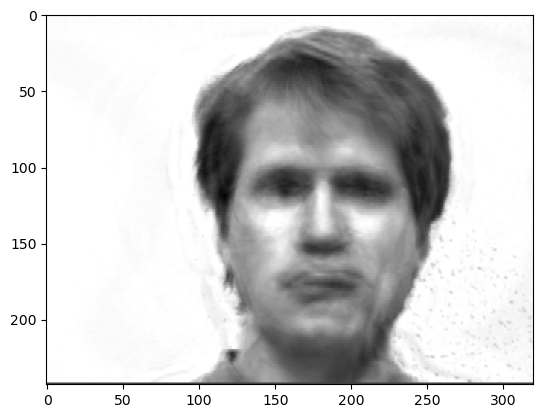

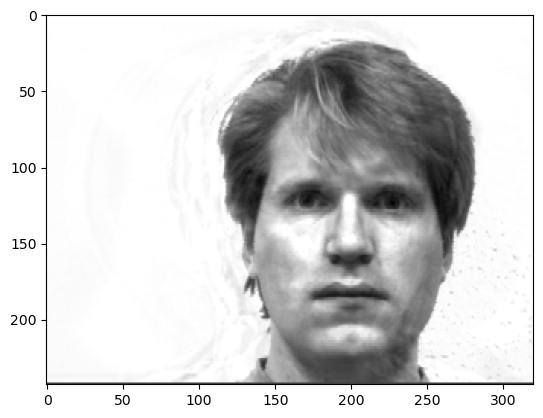

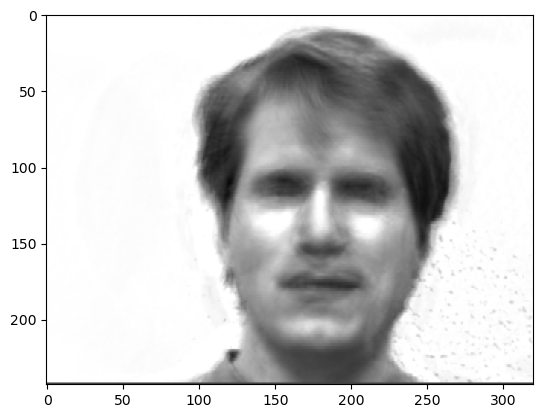

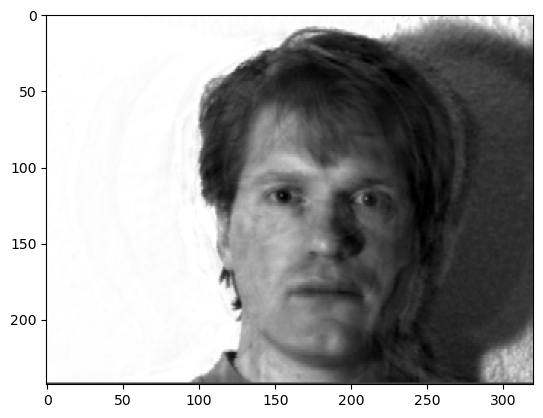

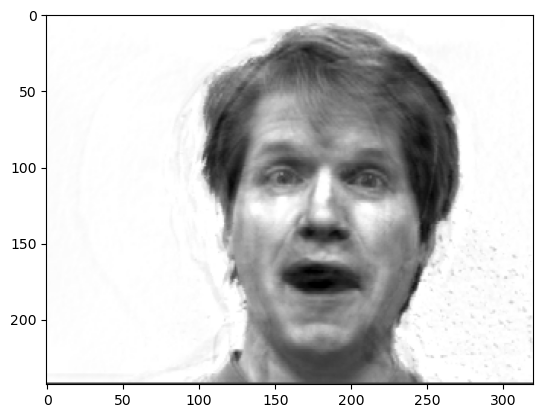

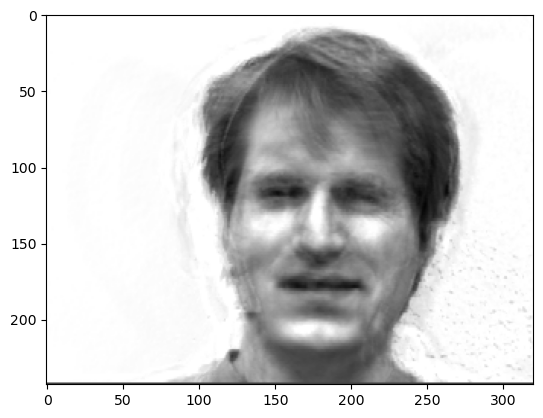

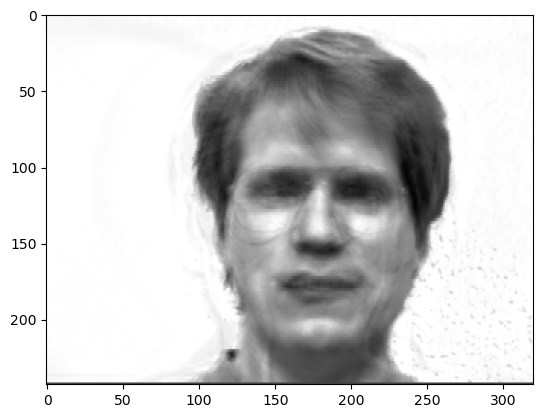

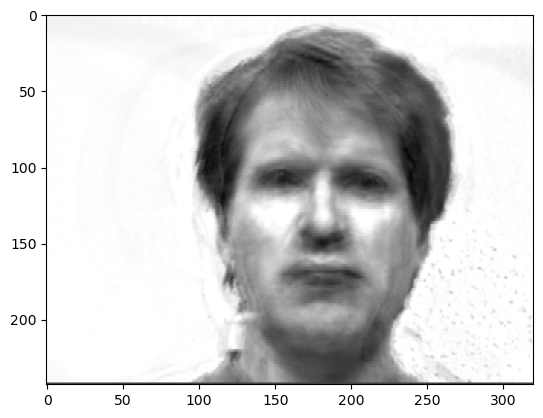

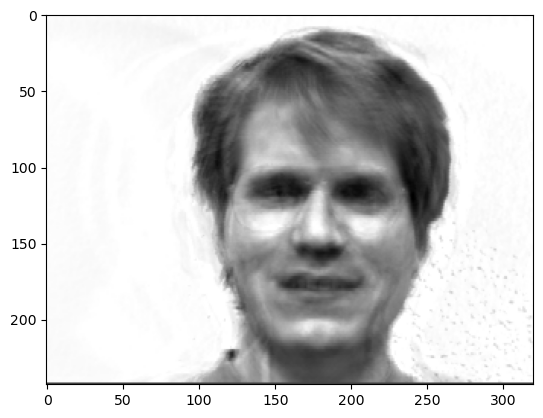

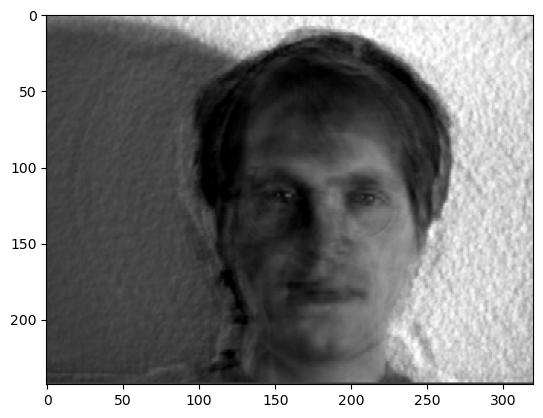

In [3]:
imgs = _get_imgs('pca_face_images')
reconstructed_imgs = _pca(imgs, 50)
_plot_reconstructed_samples(reconstructed_imgs[:, :10], imgs[0].shape)

In [6]:
# error - distance between raw data and reconstructed one
error = _distance(imgs, reconstructed_imgs)
print('frobenius norm of the elementwise distance matrix (distance): {} - 50 eigenvectors are selected'.format(error))

frobenius norm of the elementwise distance matrix (distance): 31850.315831684 - 50 eigenvectors are selected


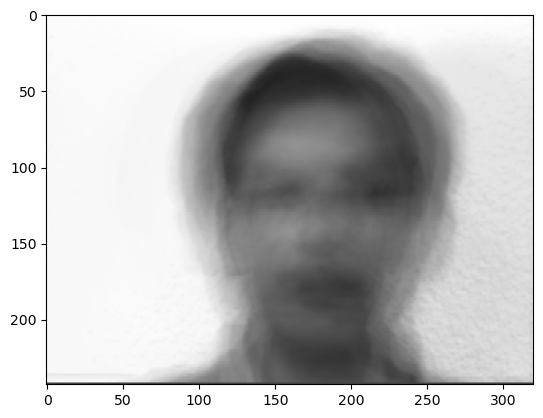

frobenius norm of the elementwise distance matrix (distance): 157397.916891514 - 1 eigenvectors are selected


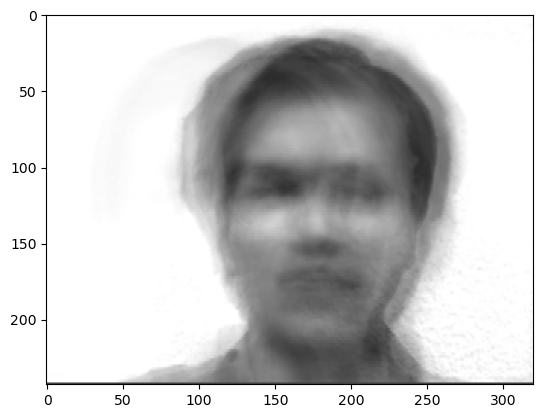

frobenius norm of the elementwise distance matrix (distance): 96350.1663721774 - 6 eigenvectors are selected


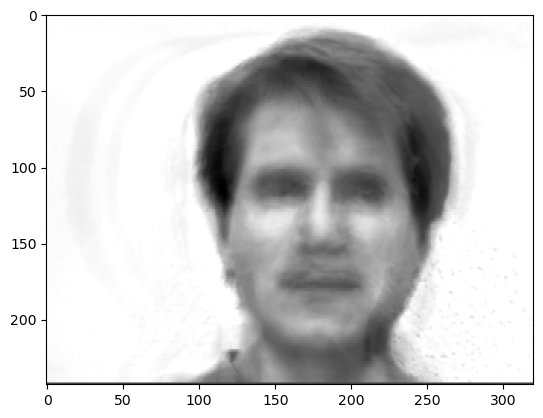

frobenius norm of the elementwise distance matrix (distance): 74655.46985001155 - 11 eigenvectors are selected


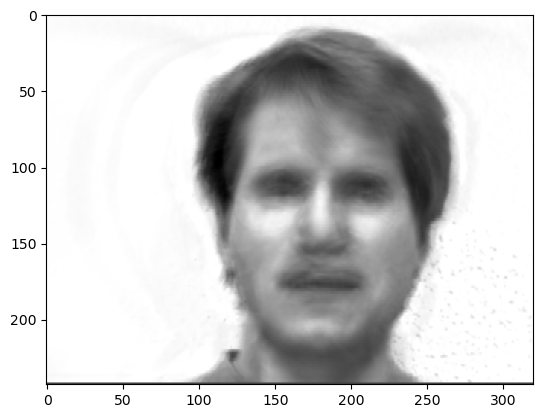

frobenius norm of the elementwise distance matrix (distance): 63795.37342399345 - 16 eigenvectors are selected


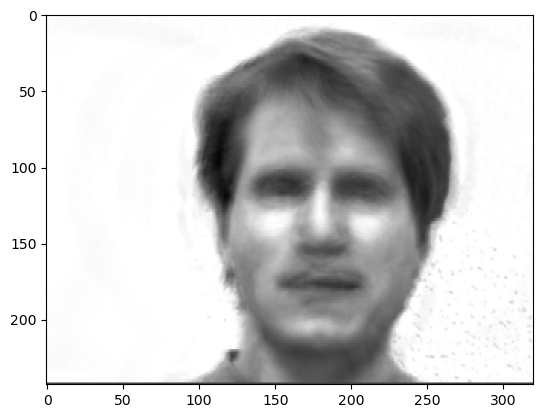

frobenius norm of the elementwise distance matrix (distance): 56504.29283256801 - 21 eigenvectors are selected


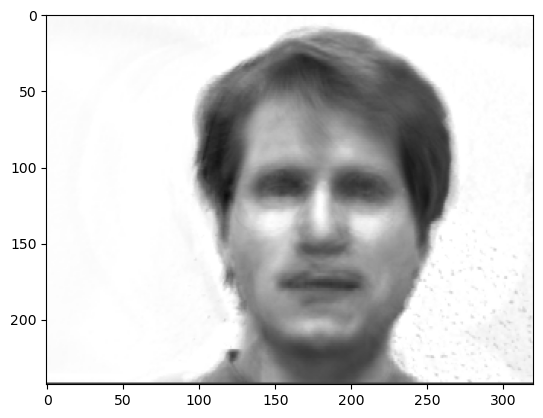

frobenius norm of the elementwise distance matrix (distance): 50772.27763984661 - 26 eigenvectors are selected


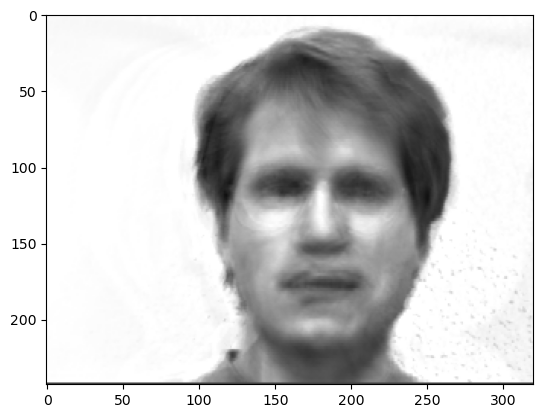

frobenius norm of the elementwise distance matrix (distance): 46140.228058933935 - 31 eigenvectors are selected


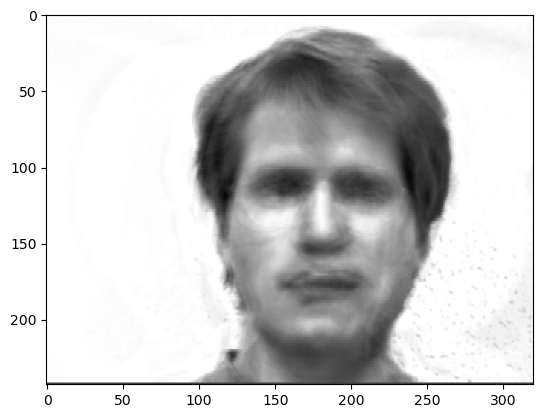

frobenius norm of the elementwise distance matrix (distance): 42027.19282855557 - 36 eigenvectors are selected


In [7]:
threshold_sample_arr = [x for x in range(1, 40, 5)]
imgs = _get_imgs('pca_face_images')
for threshold_sample in threshold_sample_arr:
    reconstructed_imgs = _pca(imgs, threshold_sample)
    _plot_reconstructed_samples(reconstructed_imgs[:, :1], imgs[0].shape, savefig=False)
    error = _distance(imgs, reconstructed_imgs)
    print('frobenius norm of the elementwise distance matrix (distance): {} - {} eigenvectors are selected'.format(error, threshold_sample))